# Aula 4 (14/10/2022)
### Nome: Adriel Bombonato Guidini Godinho
### RA: 191011631

---

# Filtros de Suavização

### [Filtro com média](https://docs.opencv.org/3.4/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html)

![Filtro_media](https://www.i2tutorials.com/wp-content/media/2019/09/Median-Filtering-i2tutorials.jpg)

Pixel assume valor da média da soma de seu valor com o dos seus vizinhos. Aplicar o método repetidas vezes deixa a imagem mais borrada. 

> Note: É necessário implementar pading para não haver truncamento.

### Filtro Correlação cruzada
H é denomidado como "filtro", "kernel", "núcleo" e "máscara"

### Filtro Gaussiano
Ao invés de uma média, é utilizada um filtro Gaussiano, onde o ponto do centro possui mais peso. É provavelmente o filtro mais útel, porém não o mais rápido.

![Gaussiana](https://docs.opencv.org/3.4/Smoothing_Tutorial_theory_gaussian_0.jpg)

### Filtro da mediana 
Filtro que não é linear e assume o valor do pixel a partir do valor central dos pixels vizinhos.

Matemáticamente, o pior que existe. Em questão de resultado, o melhor que existe

### Funções de filtros (Blur, Gaussian Blur, Median Blur)

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

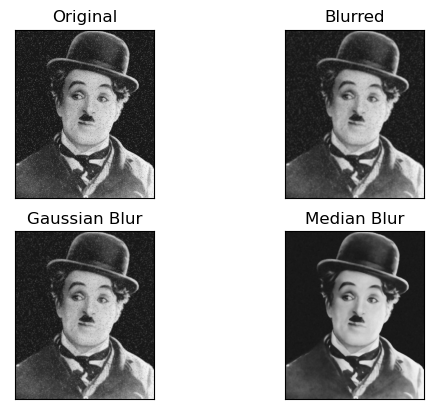

In [3]:
img = cv2.imread('images\\chaplin_noise.png')

blur = cv2.blur(img,(5,5)) # filtro por média simples
gaussian_blur = cv2.GaussianBlur(img,(5,5),0) # filtro por média Gaussiana
median_blur = cv2.medianBlur(img,5) # Filtro por mediana

# Plotar todas as imagens em uma única janela
plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(gaussian_blur),plt.title('Gaussian Blur')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(median_blur),plt.title('Median Blur')
plt.xticks([]), plt.yticks([])
plt.show()

# cv.filter2D com diferentes kernels de convolução

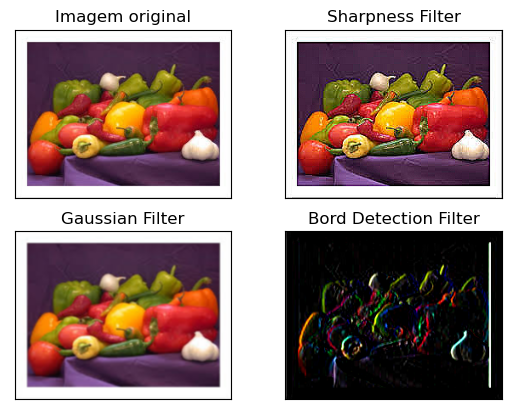

In [19]:
img = cv2.imread('images\\pimenta.jpg')

# Para a função cv.filter2D, especificar imagem de entrada, número de camadas e Kernel.

# Kernel para deixar imagem mais nítida
kernel_sharpness = np.array([
  [0, -1, 0],
  [-1, 5, -1],
  [0, -1, 0]
])

# Kernel para filtragem Gaussiana
kernel_Gaussian = (1/16) * np.array([
  [1, 2, 1],
  [2, 4, 2],
  [1, 2, 1]
])

# Kernel para detecção de bordas
kernel_bord_detection = np.array([
  [-1, 0, 1],
  [-1, 0, 1],
  [-1, 0, 1]
])

# Aplicar filtros nas imagens
sharp_img = cv2.filter2D(img, -1, kernel_sharpness)
gaussian_img = cv2.filter2D(img, -1, kernel_Gaussian)
bord_img = cv2.filter2D(img, -1, kernel_bord_detection)

# Plotar todos os resultados
titles = ['Imagem original', 'Sharpness Filter', 'Gaussian Filter', 'Bord Detection Filter']
images = [img, sharp_img, gaussian_img, bord_img]
for i in range(4):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()